In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [210]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [211]:
df = pd.read_csv('BBC News Train.csv')

In [212]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [213]:
df.shape

(1490, 3)

In [214]:
df.Text[0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [215]:
df.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


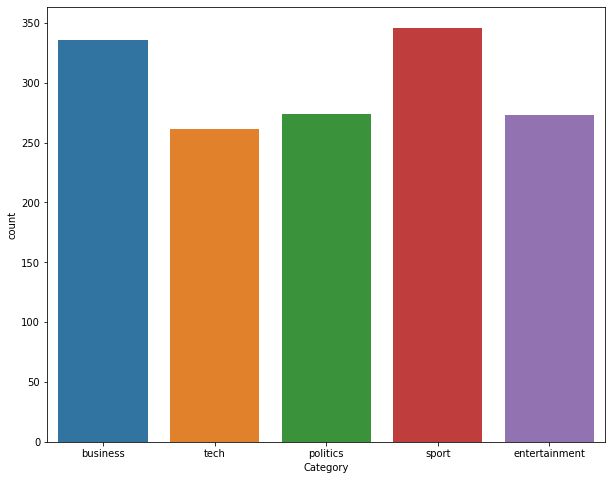

In [216]:
plt.figure(figsize = (10,8))
sns.countplot(df.Category)
plt.show()

In [217]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [218]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [219]:
list1=[]
for i in range(len(df)):
    sentence=word_tokenize(df['Text'][i])
    words=[ps.stem(word) for word in sentence if word not in set(stopwords.words('english'))]
    words_=' '.join(words)
    list1.append(words_)

In [220]:
words

['santi',
 'worm',
 'make',
 'unwelcom',
 'visit',
 'thousand',
 'websit',
 'bulletin',
 'board',
 'defac',
 'viru',
 'use',
 'googl',
 'spread',
 'across',
 'net',
 '.',
 'santi',
 'worm',
 'first',
 'appear',
 '20',
 'decemb',
 'within',
 '24',
 'hour',
 'success',
 'hit',
 '40',
 '000',
 'websit',
 '.',
 'malici',
 'program',
 'exploit',
 'vulner',
 'wide',
 'use',
 'phpbb',
 'softwar',
 '.',
 'santi',
 'spread',
 'stop',
 'googl',
 'began',
 'block',
 'infect',
 'site',
 'search',
 'new',
 'victim',
 '.',
 'worm',
 'replac',
 'chat',
 'forum',
 'webpag',
 'announc',
 'site',
 'defac',
 'malici',
 'program',
 '.',
 'soon',
 'infect',
 'site',
 'hit',
 'worm',
 'start',
 'randomli',
 'search',
 'websit',
 'run',
 'vulner',
 'phpbb',
 'softwar',
 '.',
 'googl',
 'start',
 'block',
 'search',
 'queri',
 'rate',
 'infect',
 'tail',
 'sharpli',
 '.',
 'messag',
 'sent',
 'finnish',
 'secur',
 'firm',
 'f-secur',
 'googl',
 'secur',
 'team',
 'said',
 ':',
 'seven',
 'hour',
 'respons',
 

In [221]:
words_

'santi worm make unwelcom visit thousand websit bulletin board defac viru use googl spread across net . santi worm first appear 20 decemb within 24 hour success hit 40 000 websit . malici program exploit vulner wide use phpbb softwar . santi spread stop googl began block infect site search new victim . worm replac chat forum webpag announc site defac malici program . soon infect site hit worm start randomli search websit run vulner phpbb softwar . googl start block search queri rate infect tail sharpli . messag sent finnish secur firm f-secur googl secur team said : seven hour respons someth like outrag think better . review procedur improv respons time futur similar problem googl team said . secur firm estim 1m websit run discuss group forum open sourc phpbb program . worst attack seem search conduct morn 22 decemb produc 1 440 hit site show text use defac messag . peopl use site hit santi affect worm . santi first malici program use googl help spread . juli variant mydoom viru slow s

In [222]:
list1

['worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit . cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $ 11bn ( £5.7bn ) account fraud . mr ebber plead guilti charg fraud conspiraci . prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim . ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom . mr ebber lawyer said unawar fraud argu auditor alert problem . ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer . prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . howev m

In [223]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [224]:
df.shape

(1490, 3)

In [225]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

Bag of words

In [226]:
cv = CountVectorizer()

In [227]:
X = cv.fit_transform(list1)

In [228]:
X

<1490x17573 sparse matrix of type '<class 'numpy.int64'>'
	with 220457 stored elements in Compressed Sparse Row format>

In [229]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [230]:
X.toarray().shape

(1490, 17573)

In [231]:
df1 = pd.DataFrame(X.toarray())
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17533,17534,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544,17545,17546,17547,17548,17549,17550,17551,17552,17553,17554,17555,17556,17557,17558,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568,17569,17570,17571,17572
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
df.shape

(1490, 3)

In [233]:
X.shape

(1490, 17573)

In [234]:
y = df.Category

In [235]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [236]:
y.replace(to_replace={'sport':0,'business':1,'politics':2,'entertainment':3,'tech':4},inplace = True)

In [237]:
x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.2,random_state = 12)

In [238]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17533,17534,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544,17545,17546,17547,17548,17549,17550,17551,17552,17553,17554,17555,17556,17557,17558,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568,17569,17570,17571,17572
1101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1283,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
x_train.shape

(1192, 17573)

In [240]:
y_train.shape

(1192,)

In [241]:
x_test.shape

(298, 17573)

In [242]:
y_test.shape

(298,)

In [243]:
model = RandomForestClassifier()

In [244]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
pred = model.predict(x_test)

In [246]:
accuracy_score(y_test,pred)

0.9697986577181208

In [247]:
precision_score(y_test,pred,average = 'micro')

0.9697986577181208

In [248]:
recall_score(y_test,pred,average = 'micro')

0.9697986577181208

In [249]:
f1_score(y_test,pred,average = 'micro')

0.9697986577181208

In [250]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       0.96      0.96      0.96        69
           2       0.94      0.98      0.96        50
           3       0.98      0.94      0.96        48
           4       1.00      0.97      0.98        58

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



In [251]:
model2 = SVC()

In [252]:
model2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
pred2 = model2.predict(x_test)

In [254]:
pred2

array([4, 2, 2, 0, 3, 1, 4, 2, 4, 4, 4, 0, 3, 1, 0, 2, 2, 2, 1, 0, 2, 4,
       3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 3, 1, 0, 4, 1, 2, 2, 0, 3, 4, 3, 4,
       0, 1, 3, 3, 1, 4, 0, 0, 0, 1, 2, 0, 0, 2, 3, 1, 4, 0, 2, 0, 3, 1,
       4, 0, 2, 0, 1, 2, 4, 4, 2, 2, 4, 0, 2, 2, 1, 1, 4, 2, 4, 1, 4, 1,
       4, 2, 0, 3, 0, 2, 3, 3, 1, 1, 4, 0, 4, 3, 2, 2, 1, 2, 4, 3, 4, 4,
       2, 1, 2, 1, 0, 1, 0, 1, 4, 1, 4, 0, 0, 4, 4, 1, 2, 0, 3, 4, 0, 1,
       1, 4, 0, 4, 4, 1, 0, 0, 0, 1, 0, 4, 4, 3, 3, 1, 3, 1, 1, 1, 1, 3,
       0, 1, 3, 1, 3, 4, 0, 4, 3, 1, 1, 3, 0, 1, 4, 3, 1, 3, 1, 1, 3, 2,
       3, 3, 3, 0, 1, 3, 4, 3, 4, 0, 0, 1, 2, 0, 4, 1, 0, 4, 4, 1, 1, 0,
       0, 4, 2, 0, 2, 1, 2, 0, 0, 4, 1, 3, 1, 4, 3, 0, 0, 0, 2, 0, 4, 0,
       0, 0, 4, 2, 4, 2, 1, 4, 0, 4, 1, 4, 2, 2, 0, 0, 0, 1, 1, 3, 4, 1,
       1, 4, 2, 4, 0, 1, 0, 4, 3, 4, 3, 1, 1, 4, 1, 0, 3, 2, 1, 2, 1, 0,
       4, 2, 4, 1, 3, 3, 0, 2, 0, 1, 4, 2, 3, 4, 4, 2, 1, 3, 0, 0, 1, 0,
       4, 4, 1, 3, 2, 0, 0, 2, 0, 0, 1, 4])

In [255]:
accuracy_score(y_test,pred2)

0.9395973154362416

In [256]:
precision_score(y_test,pred2,average = 'micro')

0.9395973154362416

In [257]:
recall_score(y_test,pred2,average = 'micro')

0.9395973154362416

In [258]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.94      0.94      0.94        69
           2       0.92      0.90      0.91        50
           3       0.98      0.90      0.93        48
           4       0.88      0.98      0.93        58

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [259]:
### TF-IDF 

In [260]:
tf = TfidfVectorizer()

In [261]:
X1 = tf.fit_transform(list1)

In [262]:
X1.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02401905, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02538293, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [263]:
df2 = pd.DataFrame(X1.toarray())

In [264]:
## After Performing TFIDF text is converted into vectors

In [265]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17533,17534,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544,17545,17546,17547,17548,17549,17550,17551,17552,17553,17554,17555,17556,17557,17558,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568,17569,17570,17571,17572
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.024019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.018323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.0,0.033328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1486,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1487,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1488,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df2,y,test_size = 0.3,random_state=10)

In [267]:
x_train1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17533,17534,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544,17545,17546,17547,17548,17549,17550,17551,17552,17553,17554,17555,17556,17557,17558,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568,17569,17570,17571,17572
1123,0.0,0.032796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1322,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,0.0,0.053798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.0,0.033466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1263,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
model3 = RandomForestClassifier()

In [269]:
model3.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
pred3 = model3.predict(x_test1)

In [271]:
# pred3

In [272]:
accuracy_score(y_test1,pred3)

0.9395973154362416

In [273]:
precision_score(y_test1,pred3,average='micro')

0.9395973154362416

In [274]:
recall_score(y_test1,pred3,average='micro')

0.9395973154362416

In [275]:
model4 = SVC()

In [276]:
model4.fit(x_train1,y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [277]:
pred4 = model4.predict(x_test1)

In [278]:
precision_score(y_test1,pred4,average='micro')

0.9574944071588367

In [279]:
recall_score(y_test1,pred4,average='micro')

0.9574944071588367

In [280]:
print(classification_report(y_test1,pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       0.88      1.00      0.93        91
           2       0.99      0.91      0.94        74
           3       0.96      0.94      0.95        87
           4       1.00      0.91      0.95        77

    accuracy                           0.96       447
   macro avg       0.96      0.95      0.95       447
weighted avg       0.96      0.96      0.96       447



In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [346]:
model = Sequential()

In [347]:
model.add(Dense(32,input_dim = x_train.shape[1],activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [348]:

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [349]:
y = df.Category

In [322]:
y

0       1
1       1
2       1
3       4
4       1
       ..
1485    3
1486    3
1487    1
1488    4
1489    4
Name: Category, Length: 1490, dtype: int64

In [287]:
df.Category.value_counts()

0    346
1    336
2    274
3    273
4    261
Name: Category, dtype: int64

In [342]:
z = pd.get_dummies(y,columns=["sport",'business','politics','entertainment','tech'],drop_first=True)

In [343]:
z

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
1485,0,0,1,0
1486,0,0,1,0
1487,1,0,0,0
1488,0,0,0,1


In [344]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df2,z,test_size = 0.3,random_state=10)

In [350]:
model.fit(x_train1,y_train1,epochs = 5,batch_size = 32)

Epoch 1/5
33/33 [==============================] - 1s 10ms/step - loss: 1.0391 - accuracy: 0.5379
Epoch 2/5
33/33 [==============================] - 0s 10ms/step - loss: 0.7468 - accuracy: 0.7641
Epoch 3/5
33/33 [==============================] - 0s 9ms/step - loss: 0.3344 - accuracy: 0.7785
Epoch 4/5
33/33 [==============================] - 0s 10ms/step - loss: 0.1396 - accuracy: 0.7987
Epoch 5/5
33/33 [==============================] - 0s 10ms/step - loss: 0.0803 - accuracy: 0.8955


In [351]:
model.evaluate(x_test1,y_test1)

14/14 [==============================] - 0s 6ms/step - loss: 0.1861 - accuracy: 0.8859


[0.186094269156456, 0.8859060406684875]

In [352]:
import numpy as np
pred = (model.predict(x_test1))

In [357]:
(pred.round())

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [358]:
rounded = [round(x[0]) for x in pred]

In [362]:
precision_score(y_test1,pred.round(),average = 'micro')

0.9771986970684039

In [364]:
recall_score(y_test1,pred.round(),average = 'micro')

0.9118541033434651

In [365]:
print(classification_report(y_test1,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        91
           1       0.99      0.93      0.96        74
           2       0.95      0.90      0.92        87
           3       1.00      0.86      0.92        77

   micro avg       0.98      0.91      0.94       329
   macro avg       0.98      0.91      0.94       329
weighted avg       0.98      0.91      0.94       329
 samples avg       0.67      0.67      0.67       329



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
